<a href="https://colab.research.google.com/github/RohitVerma0021/30Days-Machine-Learning-coding-chalange/blob/main/car_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/rajtilakls2510/car_price_predictor/master/quikr_car.csv")

In [ ]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
car = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


## **Quality of the dataset**
- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values



In [ ]:
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

### **Cleaning the data**

***year has many non-year values***

In [ ]:
df = df[df["year"].str.isnumeric()]

In [ ]:
df["year"] = pd.to_numeric(df["year"],errors='coerce').astype("int64")

<ipython-input-7-177989fadfbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = pd.to_numeric(df["year"],errors='coerce').astype("int64")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int64 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.0+ KB


In [ ]:
df = df[df["Price"] != "Ask For Price"]

In [ ]:
df["Price"]=df["Price"].str.replace(",","").astype(int)

### **kms_driven has object values with kms at last.**

In [ ]:
df["kms_driven"] = df["kms_driven"].str.split(" ",n=2).str[0].str.replace(",","")

In [ ]:
df = df[df["kms_driven"].str.isnumeric()]

In [ ]:
df["kms_driven"] = df["kms_driven"].astype(int)

***fuel_type column has nan values***

In [ ]:
df["fuel_type"].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [ ]:
df[df["fuel_type"].isna()]

,name,company,year,Price,kms_driven,fuel_type
132,Toyota Corolla,Toyota,2009,275000,26000,NaN


In [ ]:
df = df[~df["fuel_type"].isna()]

In [ ]:
df["name"].str.split().str.slice(0,3)

0         [Hyundai, Santro, Xing]
1         [Mahindra, Jeep, CL550]
3           [Hyundai, Grand, i10]
4      [Ford, EcoSport, Titanium]
6                    [Ford, Figo]
                  ...            
883        [Maruti, Suzuki, Ritz]
885            [Tata, Indica, V2]
886      [Toyota, Corolla, Altis]
888              [Tata, Zest, XM]
889        [Mahindra, Quanto, C8]
Name: name, Length: 816, dtype: object

In [ ]:
df["name"] = df["name"].str.split().str.slice(0,3).str.join(" ")

In [ ]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


***Reseting the index of the final cleaned data***

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.shape

(816, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [ ]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [ ]:
df = df[df["Price"] <= 6000000].reset_index(drop=True)

In [ ]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [ ]:
df.to_csv("clean_car.csv")

### **Model Building**

In [ ]:
x = df.drop(columns="Price")
y=df["Price"]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=4,test_size=0.2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

***Creating an OneHotEncoder object to contain all the possible categories***

In [ ]:
ohe = OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [ ]:
from sklearn.compose import make_column_transformer
column_transformer  = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                              remainder='passthrough')

### **Regression Model**

In [ ]:
lr=LinearRegression()

**Making a pipeline**

In [ ]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(column_transformer,lr)

### **Fitting the model**

In [ ]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred = pipe.predict(x_test)

### **Checking R2 Score**

In [ ]:
r2_score(y_test,y_pred)

0.8188957905376869

In [ ]:
scores = []
for i in range(1500):
  x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.2)
  lr=LinearRegression()
  pipe=make_pipeline(column_transformer,lr)
  pipe.fit(x_train,y_train)
  y_pred=pipe.predict(x_test)
  scores.append(r2_score(y_test,y_pred))

In [ ]:
import numpy as np

In [ ]:
np.argmax(scores)

433

In [ ]:
scores[np.argmax(scores)]

0.8456515104452564

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=np.argmax(scores),test_size=0.2)
lr=LinearRegression()
pipe=make_pipeline(column_transformer,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.8456515104452564

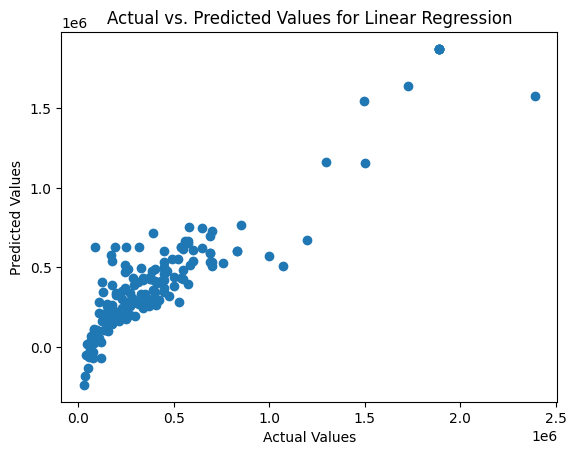

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Linear Regression')
plt.show()